In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
titanic_filepath = "../input/titanic/train.csv"
titanic_data = pd.read_csv(titanic_filepath, delimiter=",", decimal=".")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Exploratory Data Analysis

## Age

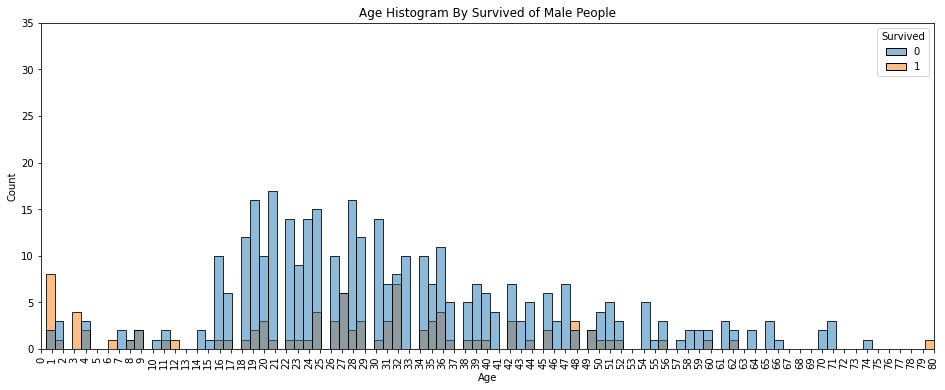

In [5]:
# Create a plot
plt.figure(figsize=(16,6))# Your code here
plt.title("Age Histogram By Survived of Male People")

ax_male = sns.histplot(data=titanic_data[titanic_data["Sex"] == "male"], x="Age", hue="Survived", bins=100)

plt.xticks(np.arange(0, 101, 1))
plt.yticks(np.arange(0, 101, 5))

plt.ylim((0, 35))
plt.xlim((0, 80))

ax_male.tick_params(axis="x", rotation=90)

plt.show()

As we can see in the barplot above:

* age <= 6 -> high chance of surviving
* 7 <= age <= 15 -> low chance of surviving
* 16 <= age <= 32 -> moderate chance of surviving
* 33 <= age <= 45 -> low chance of surviving
* 47 <= age <= 60 -> low chance of surviving
* age > 60 -> very low chance of surviving

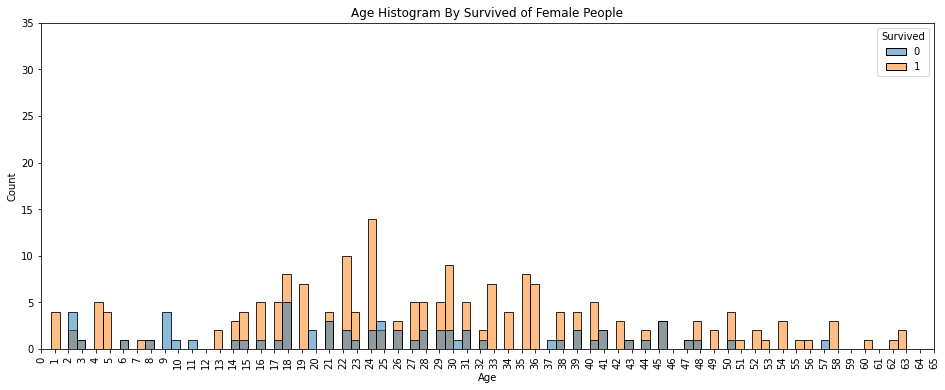

In [6]:
plt.figure(figsize=(16,6))
plt.title("Age Histogram By Survived of Female People")

ax_female = sns.histplot(data=titanic_data[titanic_data["Sex"] == "female"], x="Age", hue="Survived", bins=100)

plt.xticks(np.arange(0, 101, 1))
plt.yticks(np.arange(0, 101, 5))

plt.ylim((0, 35))
plt.xlim((0, 65))

ax_female.tick_params(axis="x", rotation=90)

plt.show()

As we can see in the barplot above:

* age <= 7 -> moderate chance of surviving
* 8 <= age <= 12 -> very low chance of surviving
* 13 <= age <= 40 -> very high chance of surviving
* 41 <= age <= 50 -> low chance of surviving
* age > 50 -> high chance of surviving

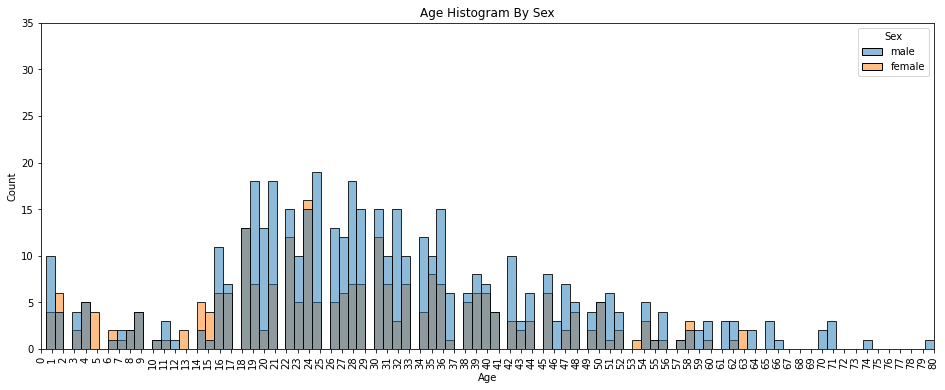

In [7]:
plt.figure(figsize=(16,6))
plt.title("Age Histogram By Sex")

ax_female = sns.histplot(data=titanic_data, x="Age", hue="Sex", bins=100)

plt.xticks(np.arange(0, 101, 1))
plt.yticks(np.arange(0, 101, 5))

plt.ylim((0, 35))
plt.xlim((0, 80))

ax_female.tick_params(axis="x", rotation=90)

plt.show()

### Conclusion from the 3 barplots above related to age and sex

- Even though there was more man than women, men died more than women
- The chance of male people's surviving tend to drop significantly when older than 14 years old
- The chance of male people's surviving tend to be high when not older than 6 years old
- The chance of female people's surviving, in general, is good indepently of age when we compare to the men, but women have a higher chance of surviving when age is in range [13;40]
- And we also can conclude that age are really important variables to define the surviving chance of passangers

## Pclass

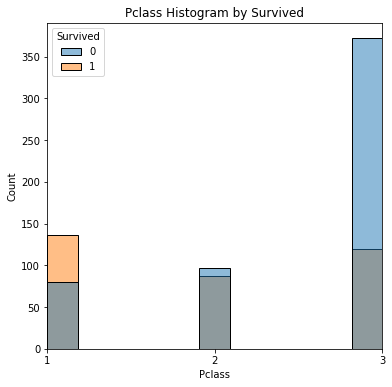

In [8]:
plt.figure(figsize=(6,6))
plt.title("Pclass Histogram by Survived")

ax = sns.histplot(data=titanic_data, x="Pclass", hue="Survived")
plt.xticks(np.arange(1,3.1,1))
plt.xlim((1,3))

plt.show()

#### **As wee can see the majority of first class survived**

### Pclass and Sex

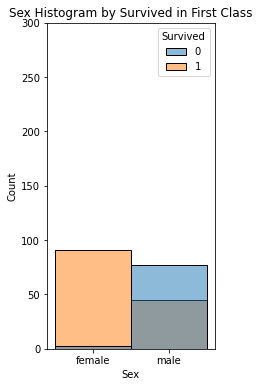

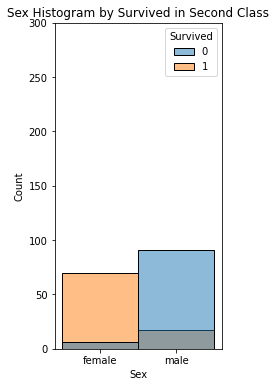

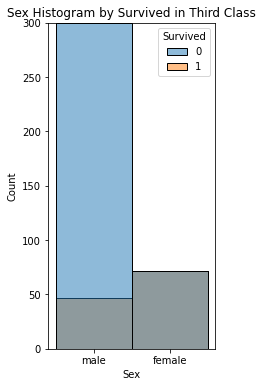

In [9]:
plt.figure(figsize=(3,6))
plt.title("Sex Histogram by Survived in First Class")
ax_1 = sns.histplot(data=titanic_data[titanic_data["Pclass"] == 1], x="Sex", hue="Survived")
plt.ylim((0,300))

plt.figure(figsize=(3,6))
plt.title("Sex Histogram by Survived in Second Class")
ax_2 = sns.histplot(data=titanic_data[titanic_data["Pclass"] == 2], x="Sex", hue="Survived")
plt.ylim((0,300))

plt.figure(figsize=(3,6))
plt.title("Sex Histogram by Survived in Third Class")
ax_3 = sns.histplot(data=titanic_data[titanic_data["Pclass"] == 3], x="Sex", hue="Survived")
plt.ylim((0,300))

plt.show()

#### **We can make a new feature with 6 categories**

* Male and First Class
* Female and First Class
* Male and Second Class
* Female and Second Class
* Male and Third Class
* Female and Third Class

### Pclass and Age

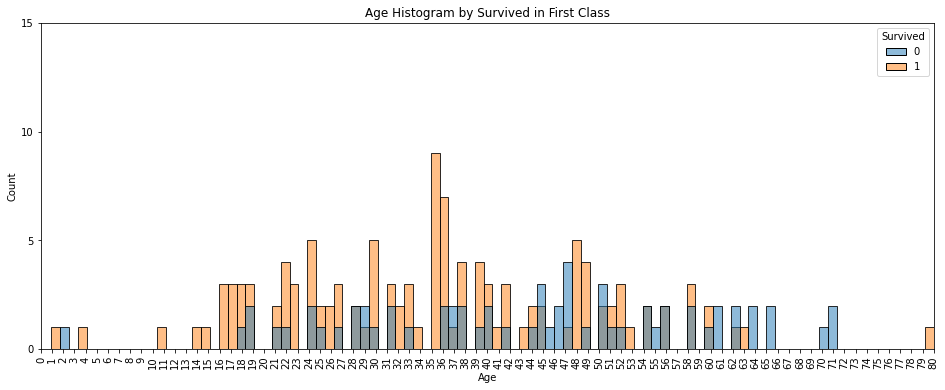

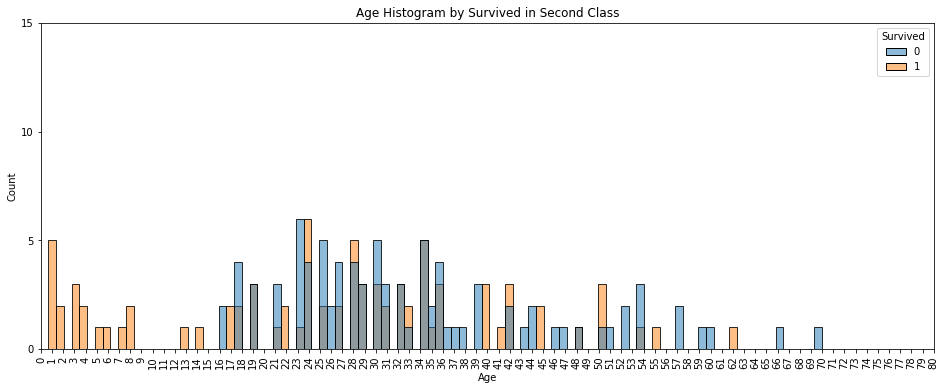

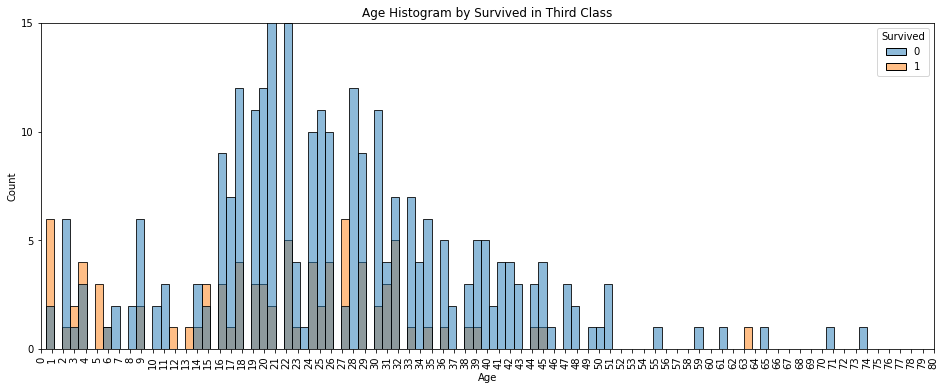

In [10]:
plt.figure(figsize=(16,6))
plt.title("Age Histogram by Survived in First Class")
ax_1 = sns.histplot(data=titanic_data[titanic_data["Pclass"] == 1], x="Age", hue="Survived", bins=100)
plt.xticks(np.arange(0, 101, 1))
plt.yticks(np.arange(0, 101, 5))

plt.ylim((0, 15))
plt.xlim((0, 80))

ax_1.tick_params(axis="x", rotation=90)
# ------------------------------------------

plt.figure(figsize=(16,6))
plt.title("Age Histogram by Survived in Second Class")
ax_2 = sns.histplot(data=titanic_data[titanic_data["Pclass"] == 2], x="Age", hue="Survived", bins=100)
plt.xticks(np.arange(0, 101, 1))
plt.yticks(np.arange(0, 101, 5))

plt.ylim((0, 15))
plt.xlim((0, 80))

ax_2.tick_params(axis="x", rotation=90)
# ------------------------------------------

plt.figure(figsize=(16,6))
plt.title("Age Histogram by Survived in Third Class")
ax_3 = sns.histplot(data=titanic_data[titanic_data["Pclass"] == 3], x="Age", hue="Survived", bins=100)
plt.xticks(np.arange(0, 101, 1))
plt.yticks(np.arange(0, 101, 5))

plt.ylim((0, 15))
plt.xlim((0, 80))

ax_3.tick_params(axis="x", rotation=90)

plt.show()

* Wee can see that all second class persons with less than 15 years old has survived
* first class persons with age less than 18 years old has pretty high chances of surviving
* Although third class persons with age less than 6 years old has more chances os surviving than the ones older, steal lower chances than the first and second class

#### **We can conclude that Pclass, Age and Sex are very important to predict the survivals**

#### **This is something that we can use in feature engineering to create relevant features**

## SibSp

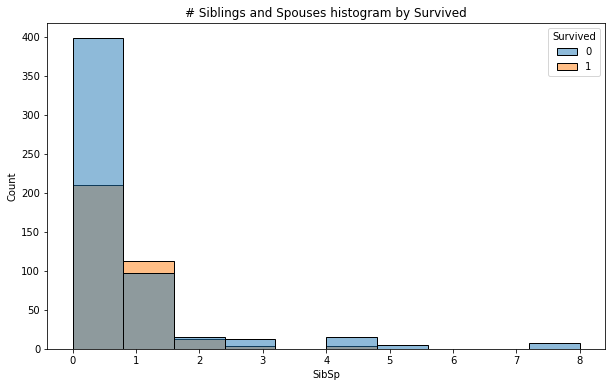

In [11]:
plt.figure(figsize=(10,6))
plt.title("# Siblings and Spouses histogram by Survived")

ax = sns.histplot(data=titanic_data, x="SibSp", hue="Survived", bins=10)

#plt.xticks(np.arange(0, 101, 1))
#plt.xlim((0, 80))

#ax.tick_params(axis="x", rotation=90)

plt.show()

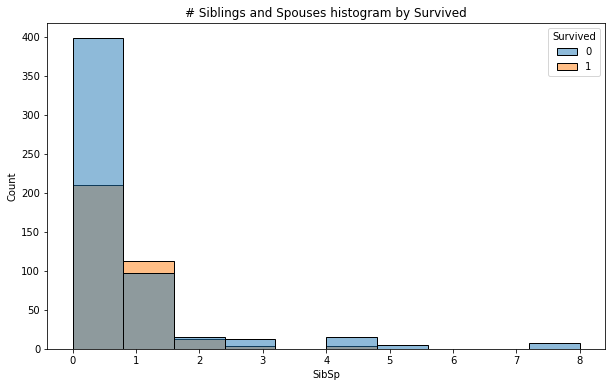

In [12]:
plt.figure(figsize=(10,6))
plt.title("# Siblings and Spouses histogram by Survived")

ax = sns.histplot(data=titanic_data, x="SibSp", hue="Survived", bins=10)

#plt.xticks(np.arange(0, 101, 1))
#plt.xlim((0, 80))

#ax.tick_params(axis="x", rotation=90)

plt.show()

### SibSp and Pclass and Survived

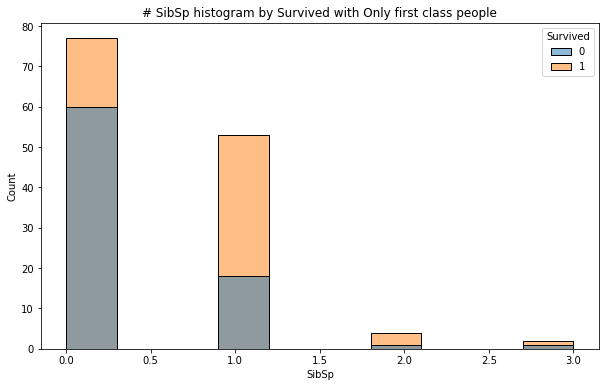

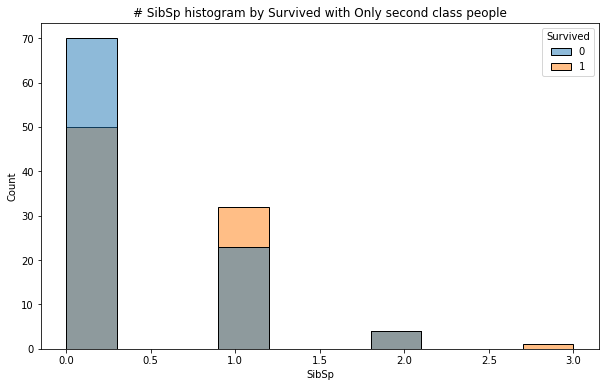

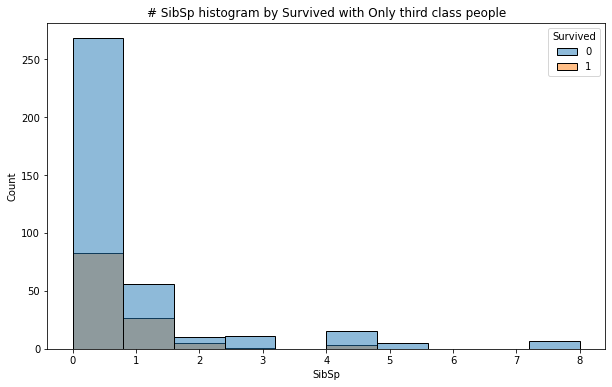

In [13]:
plt.figure(figsize=(10,6))
plt.title("# SibSp histogram by Survived with Only first class people")
ax = sns.histplot(data=titanic_data[titanic_data["Pclass"] == 1], x="SibSp", hue="Survived", bins=10)
#------------------

plt.figure(figsize=(10,6))
plt.title("# SibSp histogram by Survived with Only second class people")
ax = sns.histplot(data=titanic_data[titanic_data["Pclass"] == 2], x="SibSp", hue="Survived", bins=10)
#------------------

plt.figure(figsize=(10,6))
plt.title("# SibSp histogram by Survived with Only third class people")
ax = sns.histplot(data=titanic_data[titanic_data["Pclass"] == 3], x="SibSp", hue="Survived", bins=10)

plt.show()

In [14]:
titanic_data[(titanic_data["Sex"] == "female") & (titanic_data["SibSp"] >= 3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
